In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DSPL/Trainpreprocessed_data (1).xlsx")

In [ ]:
df = df.drop('Customer_ID', axis=1)

In [ ]:
# Define features and target
X = df.drop(columns=['cluster_catgeory'])
y = df['cluster_catgeory']

In [ ]:
#check that the list of input variables
list(X)

['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']

In [ ]:
#check that the list of target variable
y.head()

,cluster_catgeory
0,4
1,1
2,4
3,4
4,4


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Now use the encoded target variable for splitting and creating LightGBM datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded)


#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (619248, 4)
X_test Instances (154813, 4)


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the dataset (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
)

In [ ]:
# Display the number of instances and input features
print(f"Training Set: {X_train.shape[0]} instances, {X_train.shape[1]} features")
print(f"Test Set: {X_test.shape[0]} instances, {X_test.shape[1]} features")

Training Set: 619248 instances, 4 features
Test Set: 154813 instances, 4 features


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Assuming X_train is your DataFrame with missing values
# Create an imputer object with your desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your preferred strategy

# Fit the imputer to your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Now, apply SMOTE to the imputed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Convert the resampled data back to a DataFrame (optional)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

In [ ]:
# Create LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
# Optimized parameters
params = {
    "objective": "multiclass",
    "num_class": len(np.unique(y)),
    "metric": "multi_logloss",
    "boosting_type": "dart",
    "learning_rate": 0.03,
    "class_weight" : "balanced",
    "num_leaves": 10,
    "max_depth": 3,
    "min_data_in_leaf": 50,
    "feature_fraction": 0.5,
    "bagging_fraction": 0.5,
    "bagging_freq": 3,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    "num_threads": 4,
    "device": "cpu",
    "early_stopping_rounds": 50
}

In [ ]:
num_boost_round = 150
num_boost_round = 150

# Train LightGBM with early stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=num_boost_round,
    callbacks=[lgb.early_stopping(50, verbose=False)]
)
num_boost_round = 150

# Train LightGBM with early stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=num_boost_round,
    callbacks=[lgb.early_stopping(50, verbose=False)]
)

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 619248, number of used features: 4
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Start training from score -1.410088
[LightGBM] [Info] Start training from score -1.607910
[LightGBM] [Info] Start training from score -2.762077
[LightGBM] [Info] Start training from score -1.501680
[LightGBM] [Info] Start training from score -2.974716
[LightGBM] [Info] Start training from score -1.520538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
 #Make predictions
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(line) for line in y_pred]  # Convert probability output to class

In [ ]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_classes))

Accuracy: 0.9204
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     37793
           1       0.89      0.97      0.93     31010
           2       0.79      0.73      0.76      9778
           3       0.93      0.98      0.95     34486
           4       0.74      0.72      0.73      7905
           5       0.96      0.90      0.93     33841

    accuracy                           0.92    154813
   macro avg       0.88      0.87      0.88    154813
weighted avg       0.92      0.92      0.92    154813



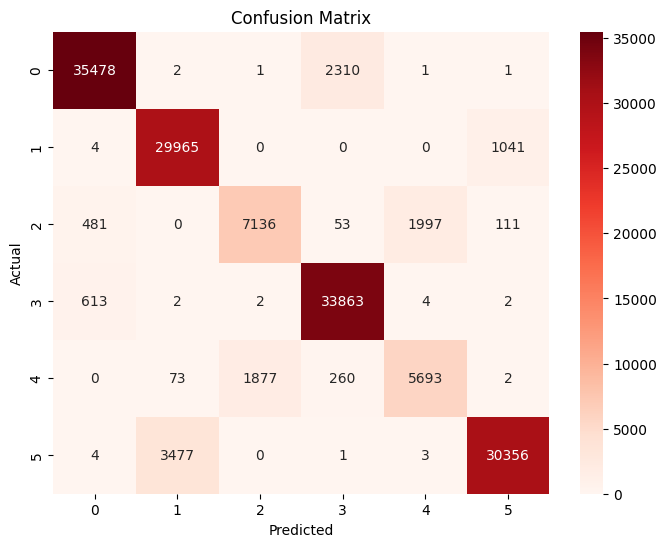

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d", cmap="Reds") # Change to "Reds"
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

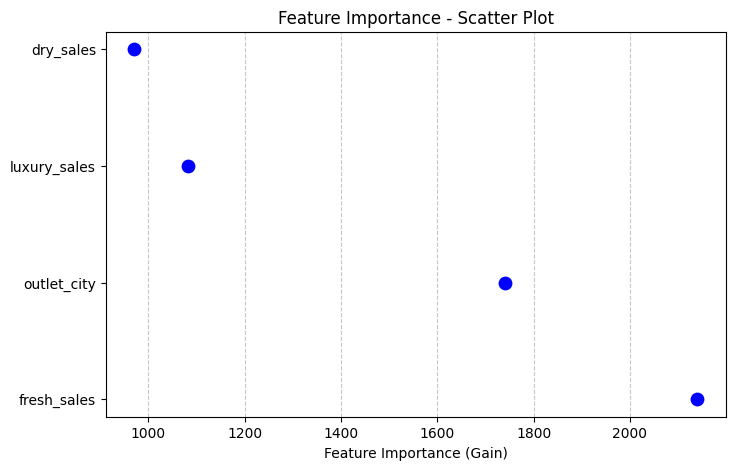

In [ ]:
# Get feature importance
importance_df = pd.DataFrame({"Feature": model.feature_name(), "Importance": model.feature_importance()})
importance_df = importance_df.nlargest(10, "Importance")

# Plot scatter graph
plt.figure(figsize=(8, 5))
plt.scatter(importance_df["Importance"], importance_df["Feature"], color="blue", s=80)
plt.xlabel("Feature Importance (Gain)")
plt.title("Feature Importance - Scatter Plot")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
!pip install --upgrade lightgbm
import lightgbm as lgb

# Dictionary to store training history
evals_result = {}

import warnings
warnings.filterwarnings("ignore")

# Train LightGBM model and log loss values
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],  # Monitor both training & validation loss
    valid_names=["Train", "Validation"],
    num_boost_round=100,
    # 'early_stopping_rounds' is moved to the callbacks list
    callbacks=[lgb.early_stopping(20, verbose=True), lgb.record_evaluation(evals_result)],
)

# Extract loss values
train_loss = evals_result["Train"]["multi_logloss"]
val_loss = evals_result["Validation"]["multi_logloss"]
epochs = range(len(train_loss))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 619248, number of used features: 4
[LightGBM] [Info] Start training from score -1.410088
[LightGBM] [Info] Start training from score -1.607910
[LightGBM] [Info] Start training from score -2.762077
[LightGBM] [Info] Start training from score -1.5

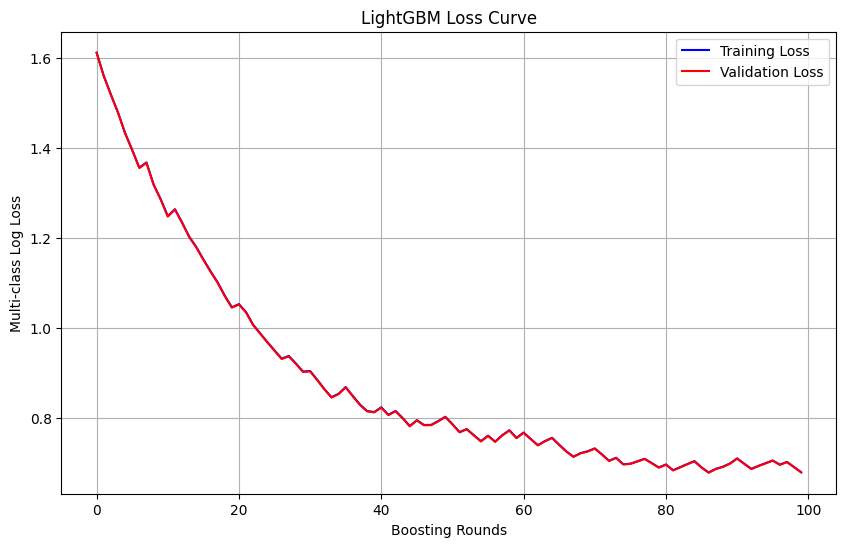

In [ ]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training Loss", color="blue")
plt.plot(epochs, val_loss, label="Validation Loss", color="red")
plt.xlabel("Boosting Rounds")
plt.ylabel("Multi-class Log Loss")
plt.title("LightGBM Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

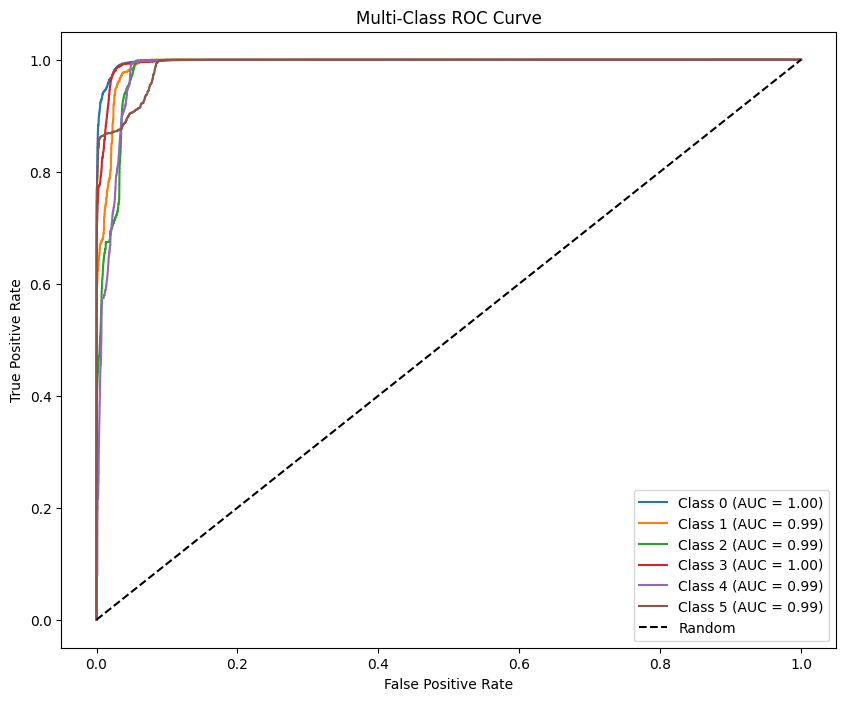

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test and y_pred are your true and predicted labels respectively
# and they are already in numerical format (encoded using LabelEncoder)

# Binarize the true labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get prediction probabilities for each class
y_pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()